In [5]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np

(-0.5, 511.5, 511.5, -0.5)

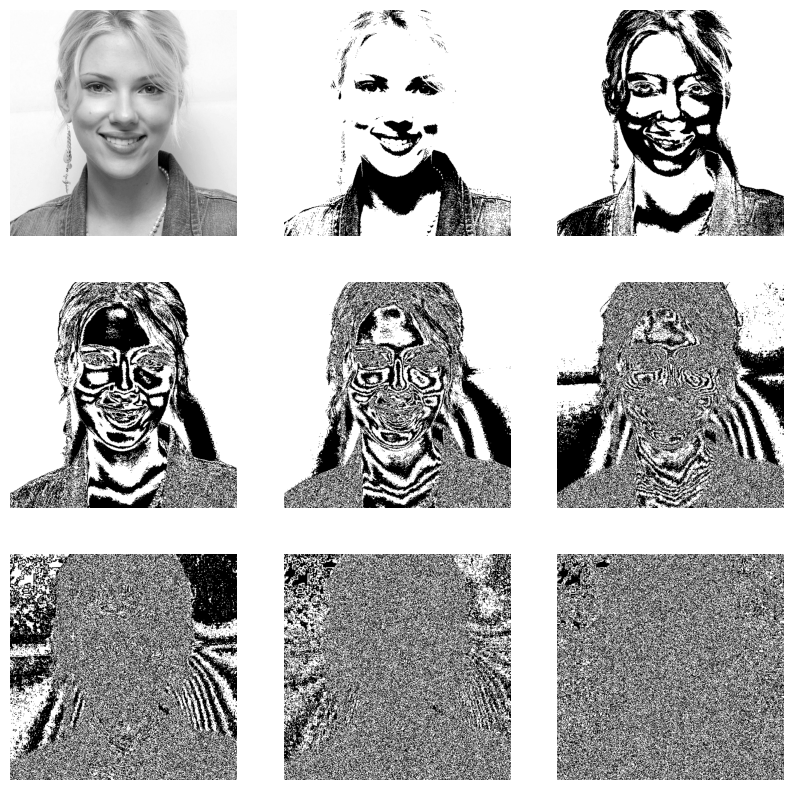

In [8]:
img = imageio.imread('images/scarlett.jpg')
plt.figure(figsize=(10,10))

# bit-wise operators
img_b1 = img & 0b10000000 #8 bit as our img is grayscale [0,255]
img_b2 = img & 0b01000000 #8 bit as our img is grayscale [0,255]
img_b3 = img & 0b00100000 #8 bit as our img is grayscale [0,255]
img_b4 = img & 0b00010000 #8 bit as our img is grayscale [0,255]
img_b5 = img & 0b00001000 #8 bit as our img is grayscale [0,255]
img_b6 = img & 0b00000100 #8 bit as our img is grayscale [0,255]
img_b7 = img & 0b00000010 #8 bit as our img is grayscale [0,255]
img_b8 = img & 0b00000001 #8 bit as our img is grayscale [0,255]

plt.subplot(331)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(332)
plt.imshow(img_b1, cmap='gray')
plt.axis('off')
plt.subplot(333)
plt.imshow(img_b2, cmap='gray')
plt.axis('off')
plt.subplot(334)
plt.imshow(img_b3, cmap='gray')
plt.axis('off')
plt.subplot(335)
plt.imshow(img_b4, cmap='gray')
plt.axis('off')
plt.subplot(336)
plt.imshow(img_b5, cmap='gray')
plt.axis('off')
plt.subplot(337)
plt.imshow(img_b6, cmap='gray')
plt.axis('off')
plt.subplot(338)
plt.imshow(img_b7, cmap='gray')
plt.axis('off')
plt.subplot(339)
plt.imshow(img_b8, cmap='gray')
plt.axis('off')

In [9]:
A = np.random.randint(0,8,[5,5])
print(A)

[[7 1 3 1 1]
 [7 7 5 0 6]
 [6 2 3 2 2]
 [2 4 4 5 0]
 [3 3 1 1 2]]


In [10]:
def histogram(A, no_levels):
    N, M = A.shape # NxM image/matrix --> img may not be square
    hist = np.zeros(no_levels).astype(int) #bucket
    for i in range(no_levels):
        pixel_value_i = np.sum(A==i)
        hist[i] = pixel_value_i
        
    return hist

Text(0, 0.5, 'Frequency')

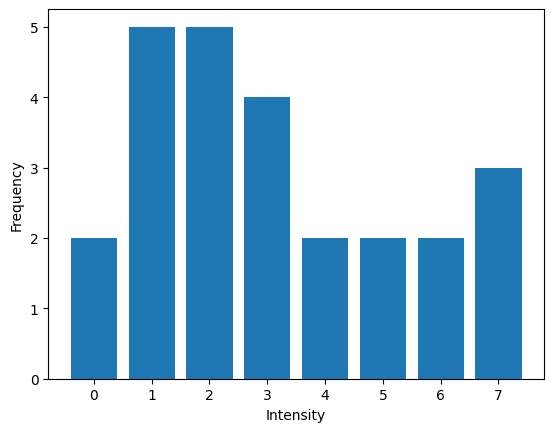

In [13]:
hist_A = histogram(A,8)
plt.bar(range(8), hist_A)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

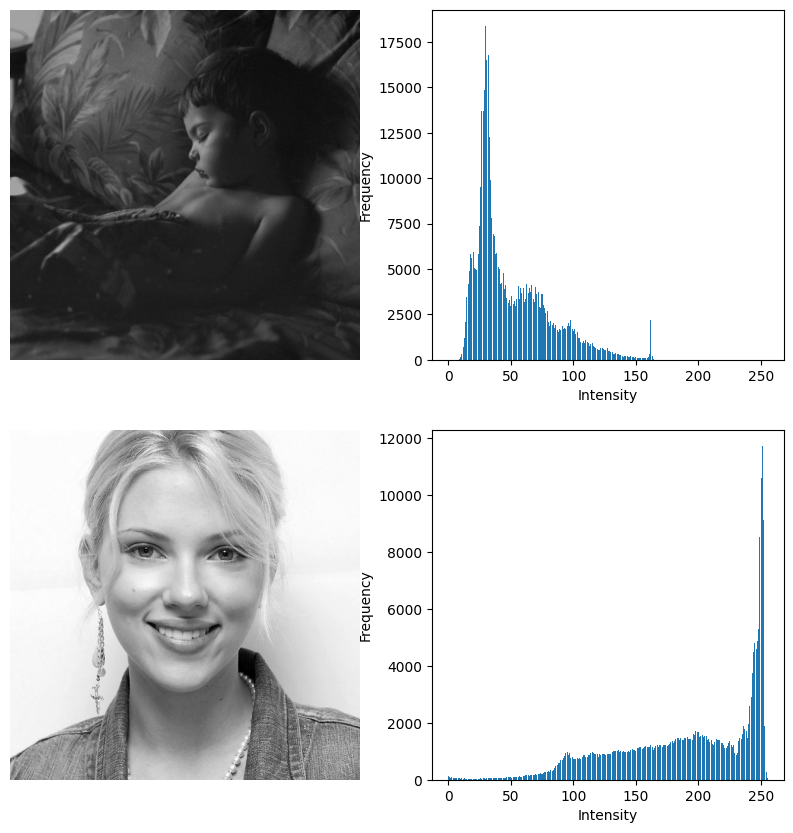

In [15]:
img1 = imageio.imread('images/nap.jpg')
img2 = imageio.imread('images/scarlett.jpg')

# compute histograms
hist_img1 = histogram(img1, 256)
hist_img2 = histogram(img2, 256)

# visualization
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(223)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(222)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.subplot(224)
plt.bar(range(256), hist_img2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

In [18]:
def histogram_equalization(A, no_levels):
    hist = histogram(A, no_levels)
    histC = np.zeros(no_levels).astype(int)
    histC[0] = hist[0]
    for i in range(1, no_levels): # scan from intensity 1 up to no_levels-1
        histC[i] = hist[i] + histC[i-1]
        
    hist_transform = np.zeros(no_levels).astype(np.uint8)
    
    N, M = A.shape
    
    A_eq = np.zeros([N,M]).astype(np.uint8) #equalized "new" image
    
    for z in range(no_levels):
        scale = ((no_levels-1)/float(N*M))
        s = scale * histC[z]
        A_eq[np.where(A==z)] = s
        
        hist_transform[z] = s
        
    return (A_eq, hist_transform)

In [19]:
img1_eq, img1_transf = histogram_equalization(img1, 256)
img2_eq, img2_transf = histogram_equalization(img2, 256)

Text(0, 0.5, 'Frequency')

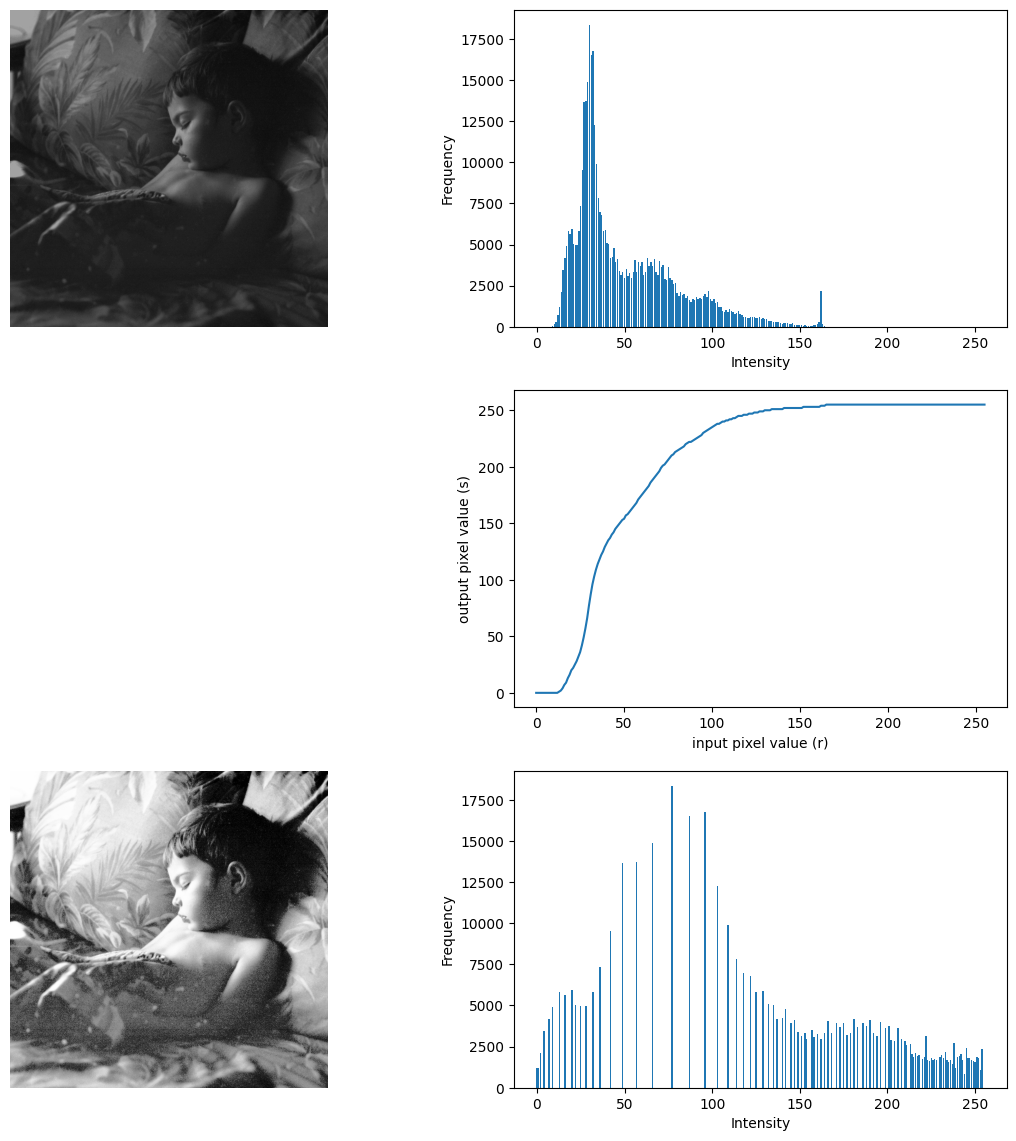

In [20]:
histeq_img1 = histogram(img1_eq, 256)
histeq_img2 = histogram(img2_eq, 256)

# visualization
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,2)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.subplot(3,2,4)
plt.plot(range(256), img1_transf)
plt.xlabel('input pixel value (r)')
plt.ylabel('output pixel value (s)')

plt.subplot(3,2,5)
plt.imshow(img1_eq, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,6)
plt.bar(range(256), histeq_img1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

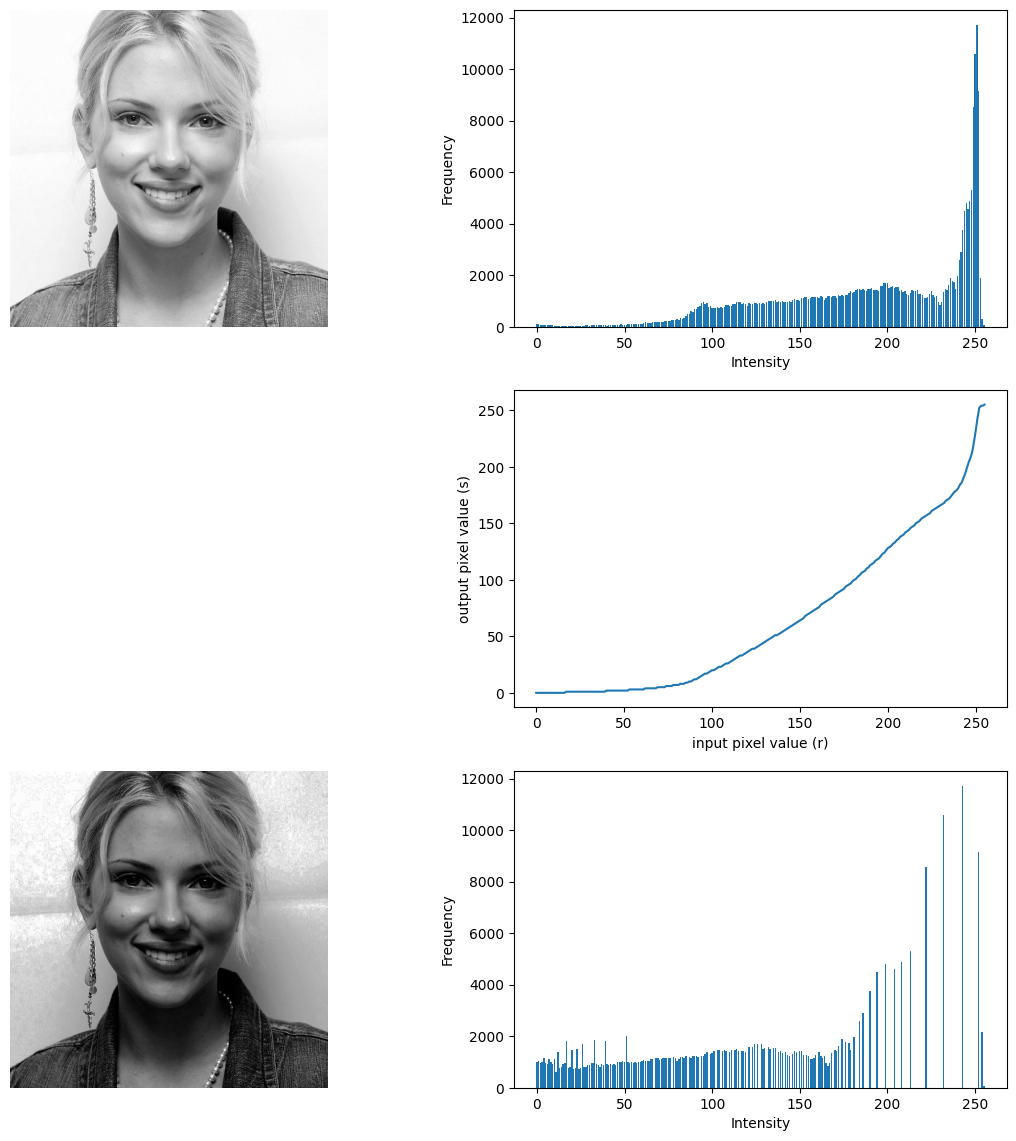

In [21]:
# visualization
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,2)
plt.bar(range(256), hist_img2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.subplot(3,2,4)
plt.plot(range(256), img2_transf)
plt.xlabel('input pixel value (r)')
plt.ylabel('output pixel value (s)')

plt.subplot(3,2,5)
plt.imshow(img2_eq, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,6)
plt.bar(range(256), histeq_img2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')